<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 8

## Introduction:
For this assignment, you will build a simple univariate linear regression model to predict profits for a food truck.

Download the data that you will use by running this command, and read it in using:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/food-truck.csv
data = pd.read_csv("food-truck.csv", header=None, names=['X', 'Y'])

--2022-11-11 22:52:13--  https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/food-truck.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘food-truck.csv’

food-truck.csv      100%[===================>]   1.33K  --.-KB/s    in 0s      

2022-11-11 22:52:13 (52.7 MB/s) - ‘food-truck.csv’ saved [1359/1359]



We will restrict ourselves to a linear hypothesis space, constructing a model that adheres to the following form:
$$ f _\Theta(x) = \theta _0 + \theta _1x $$

You might notice that this equation is similar to the linear equation: $$ f(x) = b + mx $$

(Yes you did use y=mx+b after 8th grade 😜)


In this lab, you will be writing a machine learning model that learns/approximates 2 parameters. The first one is $\theta_0$ which represents learning *b* (the bias or the intercept. The second one is $\theta_1$ which represents learning *m* (the weight, or the slope). This type of machine learning model is traditionally called Least Squares

Given data, your goal will be to estimate the parameters of this model using the method of steepest gradient descent. The parameters are defined within the construct:
$$ \theta_p = \{\theta_0,\theta_1\} $$

which is the vector of learnable coefficients that weight the observed variables, and where $\theta_1$ is a single bias coefficient. We can learn these parameters by minimizing average squared error. Thus, the loss function you will want to implement is:

Equation 1: $$ 𝓛(\Theta) = \frac{1}{2m}\sum_{i=1}^m (f(x^i)-y^i)^2 $$

This equation may look very scary at first, but it's really not that scary, so let's break it down, and define our variables.
*   m is the number of datapoints in the data set.
*   i is the index of the data point tuple that we're looking at in the sum.
*   𝓛 is the loss function (think of it like f(x)
*   $\Theta$ is the list of parameters to estimate
*   $(f(x^i)-y^i)^2$ is the squared difference between the predicted output, and the actual output

So wrapping it all together, the loss function is taking the sum of the squared differences, and dividing it by 2 * the number of datapoints in the dataset.

The goal of this lab is to minimize the loss function, because that means that our predicted values and the actual values are getting closer together. (Quick thought exercise, ask yourself why is it good that our predicted and actual values are getting closer together) 



## Exercise 1: Partial Derivatives

Analytically derive the gradient of the loss function with respect to the model parameters, $\theta_0$ and $\theta_1$. (take the partial derivative with respect to the given parameters$ 

Hint: You will need to find these two derivatives in order to calculate the gradient (L is just a less fancy version of the L(θ) above):



Give the partial derivative for the parameter $\theta_0$ below:

$$ 𝓛(\Theta) = \frac{1}{m}\sum_{i=1}^m (\Theta_0 + \Theta_1x_i) -y^i)$$

Give the partial derivative for the parameter $\theta_1$ below:

$$ 𝓛(\Theta) = \frac{1}{m}\sum_{i=1}^m (\Theta_0 + \Theta_1x^i - y^i)x^i $$

Using the two equations above, fill out the gradient calculation function below:

In [2]:
def calculate_gradient(X,y, theta):
  # TODO: The gradient with respect to the bias (the y intercept)
  #Just code the Function above
  summation = ((theta[0] + theta[1] * X) - y).mean()
  dL_d0 = summation
  # TODO: The gradient with respect to the weight (the slope)
  #Just code the Function above
  summation2 = (((theta[0] + theta[1] * X) - y) * X).mean()
  dL_d1 = summation2
  #nabla represents the full gradient, or a vector of the partial derivatives.
  nabla = (dL_d0, dL_d1)
  return nabla

You will update the current parameters with the function:

Equation 2:
$$\theta_n = \theta_p - α \frac{d𝓛(\Theta)}{d\theta_p}$$

Again, there are some scary letters, but that's not to worry, I'm going to break them down for you below.

* $\theta_n$ is the updated parameter tuple.
* $\theta_p$ is the previous parameter tuple.
* α is the learning rate (The rate at which the parameters are learning (I recommend a small value for this, like 0.1, 0.01, or 0.001) Once the lab is finished you should try different values for your learning rate and see how it changes the convergence of the parameters that minimize the loss.
* $\frac{d𝓛(\Theta)}{d\theta_p}$ is the gradient (vector of partial derviatives) that you'll be updating the parameters

Putting it all together, we have the previous parameters being subtracted from the gradient multiplied by a learning rate.

Attempt to explain why/how the update rule uses the loss function to converge the parameters to make the loss function approach it's minimum state (Credit will be given at an attempt of an explanation, not based on correctness): 

The update rule uses the loss function by getting the partial dericative of the the Loss function and multipyling that by the learning rate. you would then, get the old thetas and subtract it from that to get the new theta and see if it was correct 

## Exercise 2: The Dark Descent (Compute Cost)

In order to correctly recreate the gradient descent algorithm, you need to compute the cost function. Use the equation given in the introduction to fill out the functions below to correctly produce the right loss.

In [3]:
def predict(X, theta):
  # TODO: Write the code to output the predictions of the input 
  # Hint: You'll use all of the arguments of the function, and remember that theta is a tuple
  # Just wrtie the function 
  predictions = theta[0] + theta[1] * X
  return predictions

def sum_mean_squared_error(y, y_hat):
  # TODO: Write the sum of the mean squared error.
  # Hint: Follow equation 
  mean_squared_error = ((y - y_hat) ** 2).mean()
  return mean_squared_error

def calculate_loss(X, y, theta):
	# TODO: Write your compute loss function below.
  #Finish the function
  # Hint: You'll use the predict and the sum_mean_squared_error functions defined above
  y_hat = predict(X, theta)
  loss = sum_mean_squared_error(y, y_hat)
  return loss

Explain to me like I'm five what the code above is doing:

The predict fucntion is our original function and we are trying to see how the data will come out on the prediction. We then compare the prediction to what the Data has. If there is an error then the prediction got it wrong. If it retuns 0, then there was no error and our prediction was correct.

## Exercise 3: Hold The Line (Training Your Least Squared Algorithm)

### There are a couple of hyperparameters that you should know about before training your algorithm:

#### Learning Rate / Step Size:
Learning rate (traditionally denoted as α or alpha) is the rate at which your algorithm learns. You can also think of it as the step size in which the weight and bias ($\theta_0$ and $\theta_1$) are being updated. If the step size is too large, the weights are updated, and the loss value will blow up and never converge. If the learning rate is too small, the algorithm will take forever to converge, and won't be an effective use of your time. If you have a smaller learning rate, I recommend using a higher epoch count.

#### Epochs / Iterations:
Epochs is the number of times that the algorithm runs through the dataset. For example, if the epoch count is 500, then the algorithm with run through the dataset 500 times.

#### Batch Size:
You won't use batch size for this lab, but I still feel like it's an important concept to learn. Batch size is splitting the dataset up into smaller chunks and then feeding those smaller chuncks of data into the ML model. When it comes to larger models such as Neural Networks, it's important to have the right batch size otherwise your computer may run out of memory.





### What you need to do:
- [ ] Finish writing the training loop to train your least squares model
- [ ] Plot your linear model after 5 epochs
- [ ] Plot your linear model after 100 epochs
- [ ] Plot your linear model after 1000 epochs
- [ ] Plot your linear model after 10,000 epochs
- [ ] Plot the relationship between the epoch number and the loss at that given epoch

Below you need to fill out the TODO parts of the training function

In [4]:
def train_model(dataframe, epochs, learning_rate):
  # Get the X and y values of the column.
  cols = dataframe.shape[1]
  X = dataframe.iloc[:,0:cols-1]
  y = dataframe.iloc[:,cols-1:cols]

  # Turn the X and y values into numpy arrays.
  X = np.array(X.values)
  y = np.array(y.values)

  # convert to numpy arrays and initalize the parameter array theta
  w = np.zeros((1,X.shape[1]))
  b = np.array([0])
  theta = (b, w)

  # TODO: calculate the initial cost
  initial_L = calculate_loss(X, y, theta)

  i = 0

  # Initialize the loss values for the plot.
  loss_values = []
  loss_values.append(initial_L)

  while i < epochs:
    # TODO: Calculate Gradient
    dL_db, dL_dw = calculate_gradient(X, y, theta)
    t_0 = theta[0]
    t_1 = theta[1]

    # TODO: update theta with respect to the calculated gradient
    # Hint: 
    updated_t_0 = t_0 - learning_rate * dL_db
    updated_t_1 = t_1 - learning_rate * dL_dw

    theta = (updated_t_0, updated_t_1)

    # TODO: Calculated new loss using the updated theta values, and add it to the loss_values list.
    
    L = calculate_loss(X, y, theta)
    loss_values.append(L)

    #update I
    i += 1
  return loss_values, theta


In [5]:
def plot_line(dataframe, theta, epoch, learning_rate):
  # This function will plot your model based on some sampled values. 
  # There is no need to change this function, you'll just need to call it.
  cols = data.shape[1]
  X = dataframe.iloc[:,0:cols-1]
  y = dataframe.iloc[:,cols-1:cols]
  X = np.array(X.values)
  y = np.array(y.values)

  kludge = 0.25
  X_test = np.linspace(data.X.min(), data.X.max(), 100)
  X_test = np.expand_dims(X_test, axis=1)
  
  plt.plot(X_test, predict(X_test, theta), label="Model")
  plt.title(f"Value for {epoch} epochs and {learning_rate} step")
  plt.scatter(X[:,0], y, edgecolor='g', s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((np.amin(X_test) - kludge, np.amax(X_test) + kludge))
  plt.ylim((np.amin(y) - kludge, np.amax(y) + kludge))
  plt.legend(loc="best")
  plt.show()

Use the two functions above to do plot the models after 5, 100, 1000, and 10000 epochs.

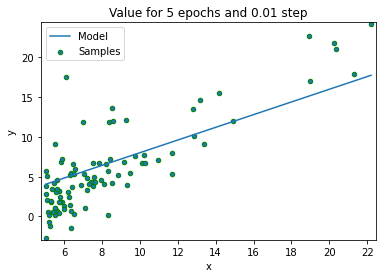

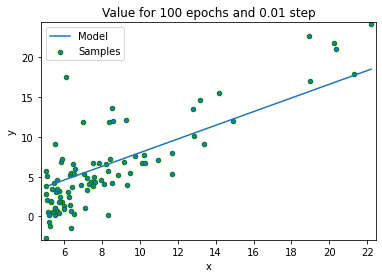

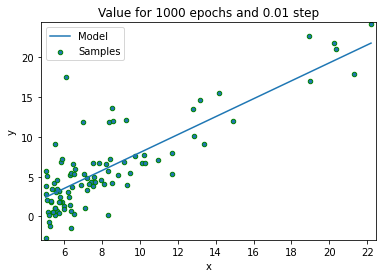

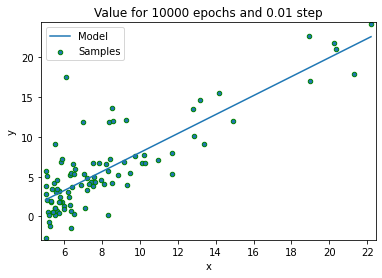

In [6]:
#Write the code for the individual iterations:
# 5 Epochs
new_theta = train_model(dataframe=data, epochs=5, learning_rate=.01)[1]
plot_line(dataframe=data, theta=new_theta, epoch=5, learning_rate=.01)

# 100 Epochs
new_theta = train_model(dataframe=data, epochs=100, learning_rate=.01)[1]
plot_line(dataframe=data, theta=new_theta, epoch=100, learning_rate=.01)
# 1000 Epochs
new_theta = train_model(dataframe=data, epochs=1000, learning_rate=.01)[1]
plot_line(dataframe=data, theta=new_theta, epoch=1000, learning_rate=.01)
# 10000 Epochs
new_theta = train_model(dataframe=data, epochs=10000, learning_rate=.01)[1]
plot_line(dataframe=data, theta=new_theta, epoch=10000, learning_rate=.01)

On the 10,000 Epochs, plot the loss values with respect to epochs using a line graph.

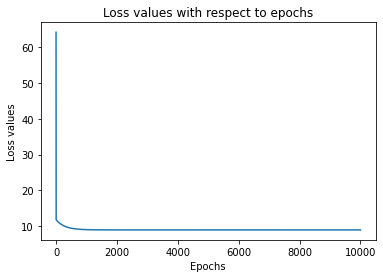

In [7]:
loss_values2 = train_model(dataframe=data, epochs=10000, learning_rate=.01)[0]
plt.plot(loss_values2)
plt.title("Loss values with respect to epochs")
plt.ylabel('Loss values')
plt.xlabel('Epochs')
plt.show()

## Exercise 4:

Since learning a linear model is a convex optimization problem, you should see convergence to a low mean squared error. However, you will need to tune the learning rate/step size, α  (bear in mind that values that are too big will result in divergence). You should record the settings you tried and what you found that worked also in the answer sheet. 

Write a few sentences describing what you learned from the training/model fitting process. 

Things to discuss: What happens when you change the step-size α? How many epochs did you need to converge to a reasonable solution (for any given step size)?

When i change the step size of the learning rate. it seemed to get less accurate and did not do as well. As for the number of epochs. It appears to converge at a reasonable solution when it hit about 1000 epochs. After that, it seemed to be staying the same with bigger epochs